### Q 1 
Task: Read the paper and write a 4-7 sentence (about a paragraph) summary. State in your own words what you learned, what
expanding your knowledge of the topic and what you found interesting about the information you received. Please include the
major points of the paper, and any weaknesses the authors point out with their research.

* It depicts a study of fatal pedestrian accidents that occurred in Kansas and the USA. We discover in this research article that male pedestrians make up a bigger share of all pedestrians. In several years, there were no pedestrian fatalities involving women, indicating that women have fewer opportunities in the workplace. Additionally, we see that there was a share decline in auto journeys between 1999 and 2000, indicating that less people were driving their own vehicles, which increased traffic on the roadways. We discovered that the majority of pedestrian fatalities were people over 65. Inadequate vision, physical limitations, a loss of reflection, etc. are the causes of senior pedestrian fatalities.The paper's main argument was that data analysis could prevent pedestrian deaths. Author attempts to address Kanas's issues with pedestrian fatalities in this essay (USA).

###  2
Task: Answer the following questions:

(a) What time of day is most common for pedestrian fatalities in Kansas (over all years)?

* When the time of day is taken into account, it is shown that the key period for fatal pedestrian crashes is between 6 p.m. and 6 a.m. The most fatal collisions occur between midnight and six in the morning, with approximately 24%, followed by nine in the evening and twelve in the afternoon, with approximately 23%. Approximately 12% of pedestrian fatalities occur between the hours of 6 and 9 in the morning.

(b) How does this compare with the most common time of day for the US overall?

* This time period only makes up 9% of all fatalities in the USA, which is the least amount of pedestrian deaths of any time period. Between 6 and 9 o'clock in the evening, there are the most pedestrian fatalities in the USA (25%). After 6 o'clock in the evening, visibility is reduced due to darkness, and there may also be more pedestrian accidents that result in fatalities.

(c) Looking at figure 11, would you say poor atmospheric conditions have a significant impact on pedestrial fatalities?

* When atmospheric condition is taken into account, it is discovered that the majority of fatal crashes take place on clear days with no adverse conditions, contrary to what we would have expected given that poor atmospheric condition has always had a significant impact on pedestrian fatalities (see Figure 11 of the paper).

(d) On page 392, the author states “For Kansas, speed limits between 30 mph and 40 mph account for 52% of total crashes (26%
crashes for 30 mph and 26% for 35 mph or 40mph), …”. Why is this statement as written incorrect?


* This can be explained by the fact that Kansas has a lot of rural roads with high speed limits and lax enforcement of the law, both of which may contribute to an increase in deadly pedestrian collisions.

(e) The authors go on to explain the abnormally high number of fatalities at higher speeds with “… Kansas has lot of rural roads,where the speed limit is high and in rural roads, laws are not strictly enforced, all of which might lead to a larger number of fatal pedestrian crashes.”. Which of the suggested countermeasures would you think might successfully addres this issue? If you do not find anything sufficient, what might you recommend instead?

* After a certain amount of time has passed, breakers should be fitted. People should also be made aware of the posted speed limits on the roads.

In [1]:
import os
import requests
import zipfile
import collections
import pandas as pd
import numpy as np

In [2]:
all_df = pd.DataFrame()

for i in range(1975, 2021, 5):
    df = pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1',low_memory=False)
    df1 = pd.read_csv(f"person_all_years/{i}_PERSONE.csv", encoding = 'ISO-8859-1',low_memory=False)
    df1.drop(["HARM_EV"],inplace=True,axis=1)
    df2 = pd.read_csv(f"vehicle_all_years/{i}_vehicle.csv", encoding = 'ISO-8859-1',low_memory=False)
    df2.drop(["HARM_EV"],inplace=True,axis=1)
    df3 = pd.merge(df,df1,on='ST_CASE',how="inner").reset_index(drop=True)
    all_df=pd.merge(df3,df2,on="ST_CASE",how="inner").reset_index(drop=True)

In [3]:
all_df=all_df[all_df["STATENAME_x"] != "KANAS"]
all_df=all_df[["AGE","FATALS","HARM_EV","VSPD_LIM","HOURNAME","HOUR","YEAR"]]
all_df=all_df[all_df["HARM_EV"]==8]

In [4]:
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]>=60,"60 mph ot higher",inplace=True)
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==35,"35 or 40 mph",inplace=True)
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==40,"35 or 40 mph",inplace=True)
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==45,"45 or 50 mph",inplace=True)
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==50,"45 or 50 mph",inplace=True)
all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==55,"55 mph",inplace=True)

In [5]:
le=[0,5,10,15,20,25,30]
for i in le:
    all_df["VSPD_LIM"].mask(all_df["VSPD_LIM"]==i,"30 mph or less",inplace=True)

In [6]:
ad=all_df.groupby(by="VSPD_LIM").sum("FATALS")
speed=["30 mpd or less","35 or 40 mph","45 or 50 mph","55 mph","60 mph ot higher"]
total_fatals=ad["FATALS"].sum()
perenctarge_fatals=[]
for i in range(len(speed)):
    perenctarge_fatals.append(ad["FATALS"][i]/total_fatals*100)

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

#### § Task: Recreate the graph (with actual FARS data) in Figure 15. You do not need to show the Kansas data.

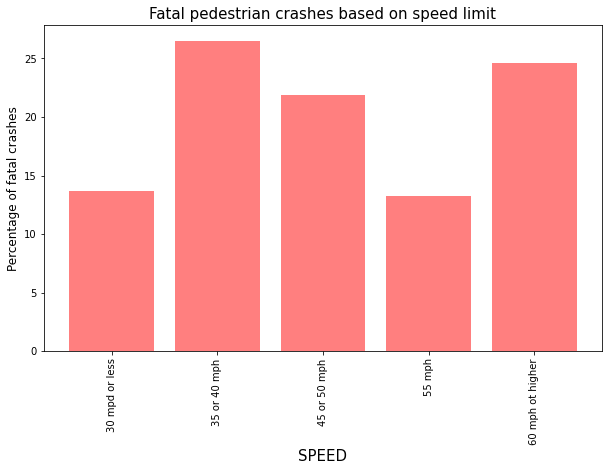

In [9]:
plt.figure(figsize=(10,6))
plt.bar(x=speed,height=perenctarge_fatals,color="red",alpha=0.5,)
plt.xticks(rotation=90)
plt.xlabel("SPEED",fontsize=15)
plt.ylabel("Percentage of fatal crashes",fontsize=12)
plt.title("Fatal pedestrian crashes based on speed limit",fontsize=15)
plt.show()

#### § Task: Recreate Figure 4 and Figure 9.

In [10]:
age_grp=[]
for i in all_df["AGE"]:
    if i<16:
        age_grp.append("<16")
    elif i>=16 and i<=24:
        age_grp.append("16-24")
    elif i>=25 and i<=34:
        age_grp.append("25-34")
    elif i>=35 and i<=44:
        age_grp.append("35-44")
    elif i>=45 and i<=54:
        age_grp.append("45-54")
    elif i>=55 and i<=64:
        age_grp.append("55-64")
    else:
        age_grp.append("65+")
all_df["AGE_GRP"]=age_grp
ac=all_df.groupby(by="AGE_GRP").sum()

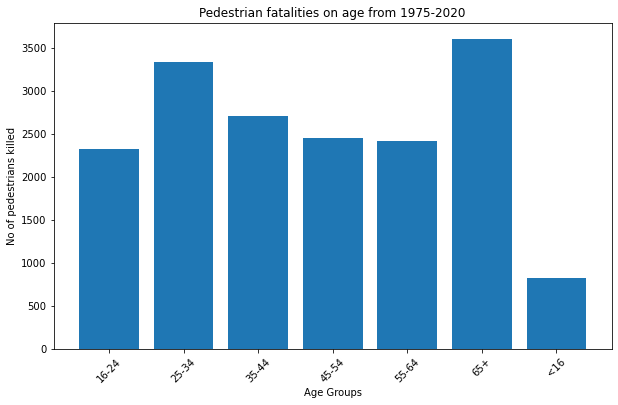

In [11]:
plt.figure(figsize=(10,6))
plt.bar(x=ac.index,height=ac["FATALS"])
plt.xticks(rotation=45)
plt.xlabel("Age Groups")
plt.ylabel("No of pedestrians killed")
plt.title("Pedestrian fatalities on age from 1975-2020")
plt.show()

In [12]:
time_grp=[]
for i in all_df["HOUR"]:
    if i>=0 and i<=5:
        time_grp.append("Midnight to 5:59 am")
    elif i>=6 and i<=8:
        time_grp.append("6 am to 8:59 am")
    elif i>=9 and i<=14:
        time_grp.append("9 am to 2:59 pm")
    elif i>=15 and i<=17:
        time_grp.append("3 pm to 5:59 pm")
    elif i>=18 and i<=20:
        time_grp.append("6pm to 8:59 pm")
    else:
        time_grp.append("9 pm to 11:59 pm")

In [13]:
all_df["Time_grp"]=time_grp
ae=all_df.groupby(by="Time_grp").sum()

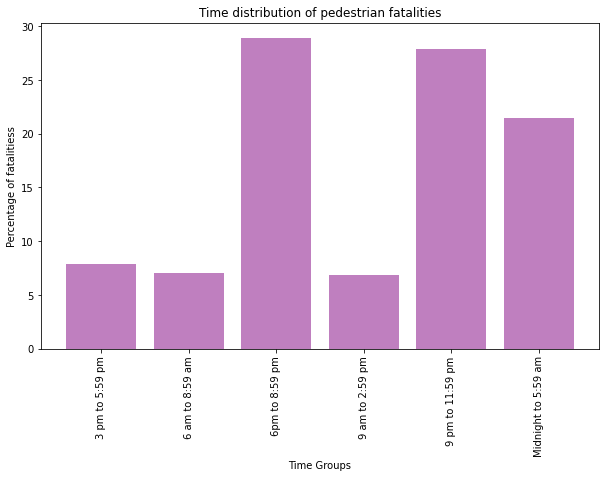

In [14]:
plt.figure(figsize=(10,6))
plt.bar(x=ae.index,height=ae["FATALS"]/ae["FATALS"].sum()*100,color='purple',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Time Groups")
plt.ylabel("Percentage of fatalitiess")
plt.title("Time distribution of pedestrian fatalities")
plt.show()

#### § Task: Take the data from Figure 4 and Figure 9 and combine them. What you will end up with is a grouping by age band, then
by time of day. Your final graph will be able to answer questions about which age group is more or less likely to experience a
pedestrian fatality during which time of day.

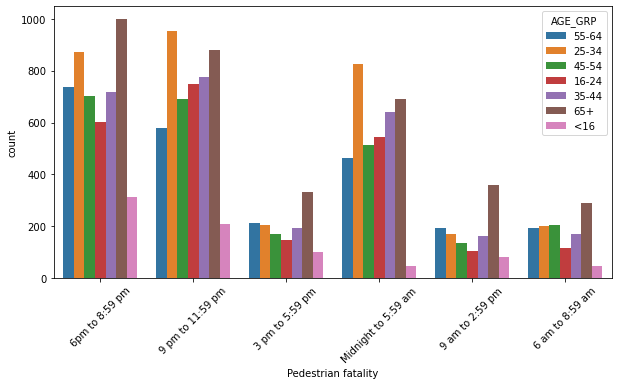

In [15]:
plt.figure(figsize=(10,5
                   ))
sns.countplot(x="Time_grp",hue="AGE_GRP",data=all_df)
plt.xticks(rotation=45)
plt.xlabel("Pedestrian fatality")
plt.show()

#### § Task: (Reshape the US dataset from HW1)

In [16]:
hw1_all_df = pd.DataFrame()
for i in range(1975, 2021, 5):
    df = pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    hw1_all_df = pd.concat([hw1_all_df, df]).reset_index(drop=True)
selected_df = hw1_all_df.loc[:, ["STATE","STATENAME" ,'MONTH', 'DAY', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
                                'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR',"HARM_EV"]]

selected_df=selected_df[selected_df["STATENAME"]!="Kansas"]
selected_df.drop("STATENAME",inplace=True,axis=1)
selected_df=selected_df[selected_df["HARM_EV"]==8]
selected_df.dropna(inplace=True)
selected_df=selected_df.sample(n=5000)
selected_df.head()

,STATE,MONTH,DAY,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR,HARM_EV
91889,9,11,30,18,5,0,2,1,0.0,1,7,0,8
181716,26,10,28,7,2,0,2,2,0.0,1,7,0,8
236380,51,12,7,20,2,0,3,1,0.0,1,5,0,8
332805,44,12,9,17,1,0,3,10,0.0,1,4,0,8
207451,9,9,1,23,2,0,2,2,0.0,1,6,1,8


#### § Task: (Perform ad hoc K-Means clustering)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_scaled_data=sc.fit_transform(selected_df)

In [18]:
from sklearn.cluster import KMeans
c=[5,10,12]
for i in c:
    cluster=KMeans(n_clusters=i,init='k-means++')
    cluster.fit(new_scaled_data)
    print("Centroids of cluster:{}".format(cluster.cluster_centers_))

Centroids of cluster:[[-2.88909679e-02  3.26640948e-02  4.34080107e-02 -7.85170896e-02
   3.78677648e-01  1.08556418e-01  1.71443839e-01 -1.20574308e-01
  -5.66592700e-02  6.29009570e-01  4.09837661e-02  2.13104462e+00
   0.00000000e+00]
 [-8.80487653e-01 -3.57863437e-02 -3.47899405e-02  4.22208249e-02
  -6.12321603e-02 -2.00040012e-02  3.42636173e-02 -1.02652606e-01
  -5.66592700e-02 -1.15909390e-01 -2.43912310e-02 -3.95115020e-01
   0.00000000e+00]
 [ 9.02212396e-01  1.96357672e-02  2.05791845e-02 -1.78428526e-02
  -6.18671408e-02 -2.00040012e-02 -1.28646785e-01 -9.25925298e-02
  -5.66592700e-02 -1.15909390e-01  1.27561558e-02 -3.95115020e-01
   0.00000000e+00]
 [ 4.58430608e-01  7.86997016e-03  3.28928398e-01 -3.42751491e-01
  -8.17685244e-02 -2.00040012e-02 -1.13723776e+00 -1.62802285e-01
   1.76493626e+01 -1.15909390e-01 -2.01322038e-01 -3.95115020e-01
   0.00000000e+00]
 [-7.77357468e-02  1.66069951e-01 -1.64581124e-01  2.84500694e-01
  -7.11253242e-01 -2.00040012e-02  1.47994236

#### § Task: (Perform elbow analysis to find optimal cluster size)

In [19]:
max_clusters = 15
css = [] # within cluster sum of squares
for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=200, n_init=10, random_state=0)
    kmeans.fit(new_scaled_data) # where d is the dataset you have standardized in the first part of this
    css.append(kmeans.inertia_)

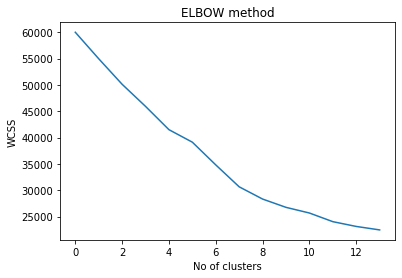

In [20]:
plt.plot(css)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("ELBOW method")
plt.show()

#### § Task: (Find out where Kansas fits in)

In [21]:
cluster1=KMeans(n_clusters=6,init='k-means++')
cluster1.fit(new_scaled_data)
label=cluster1.predict(new_scaled_data)

In [22]:
state=[]
fatal=[]
for i in range(len(new_scaled_data)):
    fatal.append(new_scaled_data[i][9])
    state.append(new_scaled_data[i][0])

C:\Users\VIPIN JANGHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

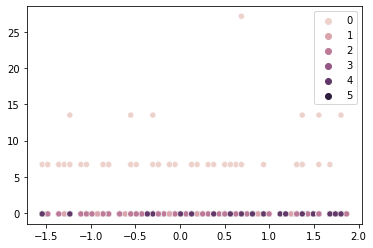

In [23]:
sns.scatterplot(state,fatal,hue=label)

* According to what we found using our optimal K value using elbow method which is 6 in our case it seems that Kansas is going to fit in cluster has label 0

#### § Task: (Perform Agglomorative Clustering)

In [24]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [25]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=5)
agc=agc.fit(new_scaled_data)

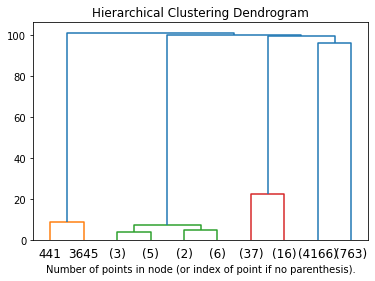

In [26]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(new_scaled_data)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()